In [1]:
import numpy as np
import os


from lmfit.models import GaussianModel,Model
from sklearn.linear_model import LinearRegression
from sklearn import mixture,metrics

# нужно предварительно установить geos
# pip install geos
from shapely.geometry import Polygon  

from scipy.stats.distributions import norm
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

    
from matplotlib import pyplot as plt
from matplotlib import cm

from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse

from scipy import ndimage as ndi
from scipy.spatial import ConvexHull
from scipy.spatial import distance
from numpy import linalg 

from skimage import io
from skimage.draw import ellipse
from skimage.color import rgb2gray
from skimage import filters
from skimage.morphology import disk
from skimage import transform
from skimage.feature import peak_local_max
import skimage.segmentation as seg

from PIL import Image, ImageDraw, ImageFilter,ImageOps
import copy
import cv2

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.ndimage import distance_transform_edt as edt
from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon,subdivide_polygon

from radio_beam.commonbeam import getMinVolEllipse


from grain_utils import grainPreprocess,grainShow,grainMark,grainDraw,grainApprox,grainStats,grainMorphology


In [3]:
def img_load_preprocess(path,names,h=150,k=1):
    imgs_path=[path+'/'+name for name in names]
    imgs=[]
    for img_path in imgs_path:
        img=io.imread(img_path)
        img=grainPreprocess.image_preprocess(img,h,k)
        imgs.append(img)
    return imgs

In [4]:
path='images'
grain_names=['Ultra_Co8.jpg','Ultra_Co11.jpg','Ultra_Co6_2.jpg','Ultra_Co15.jpg','Ultra_Co25.jpg']
grain_images=img_load_preprocess(path,grain_names)

D:\PROJECTS\python\grain_segmentation\grain_utils.py:61: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img=rgb2gray(gray)


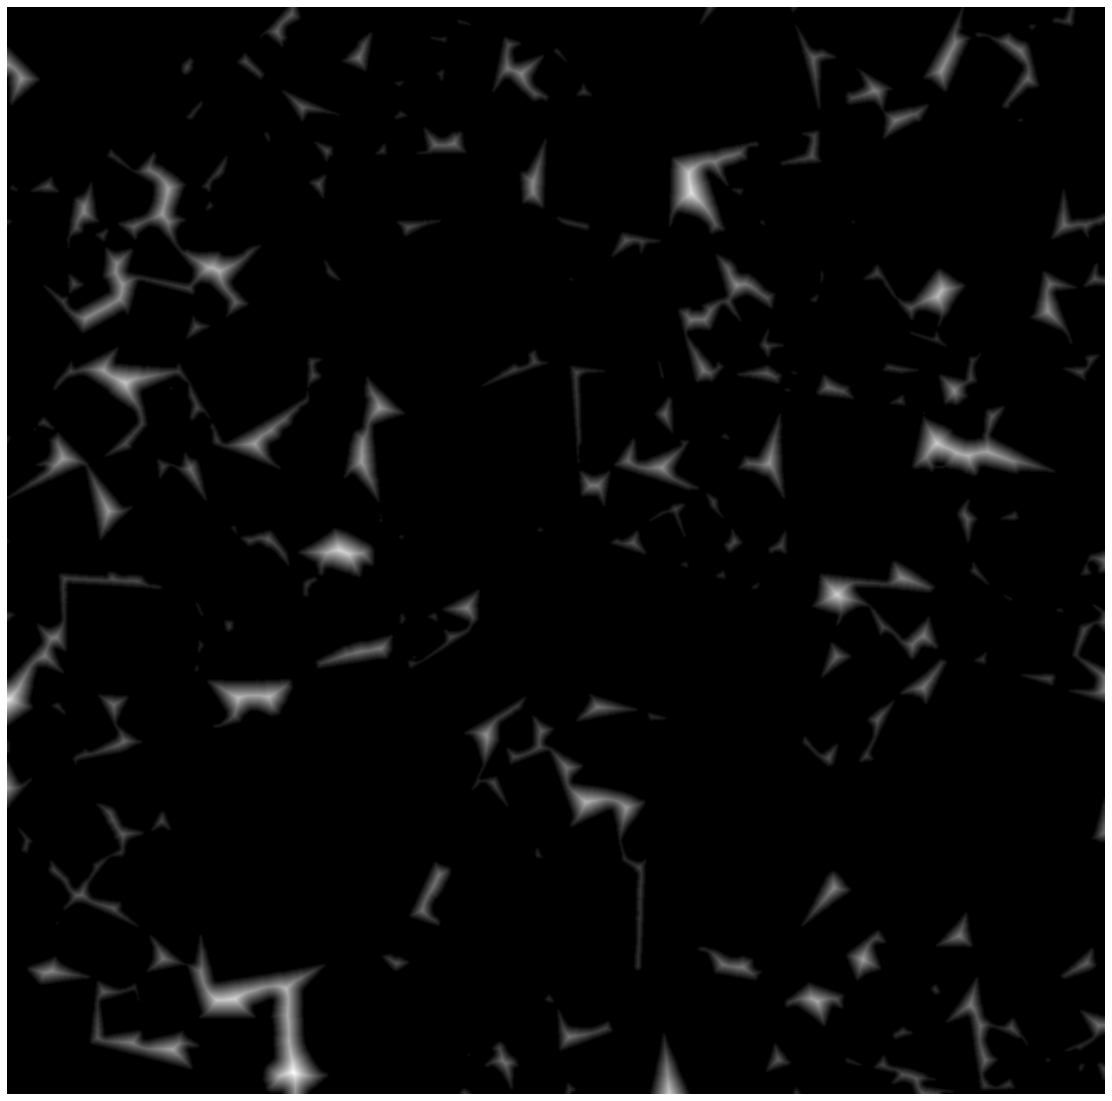

In [5]:
img=edt(grain_images[2])
grainShow.img_show(img,cmap='gray')

Text(0.5, 1.0, 'Separated objects')

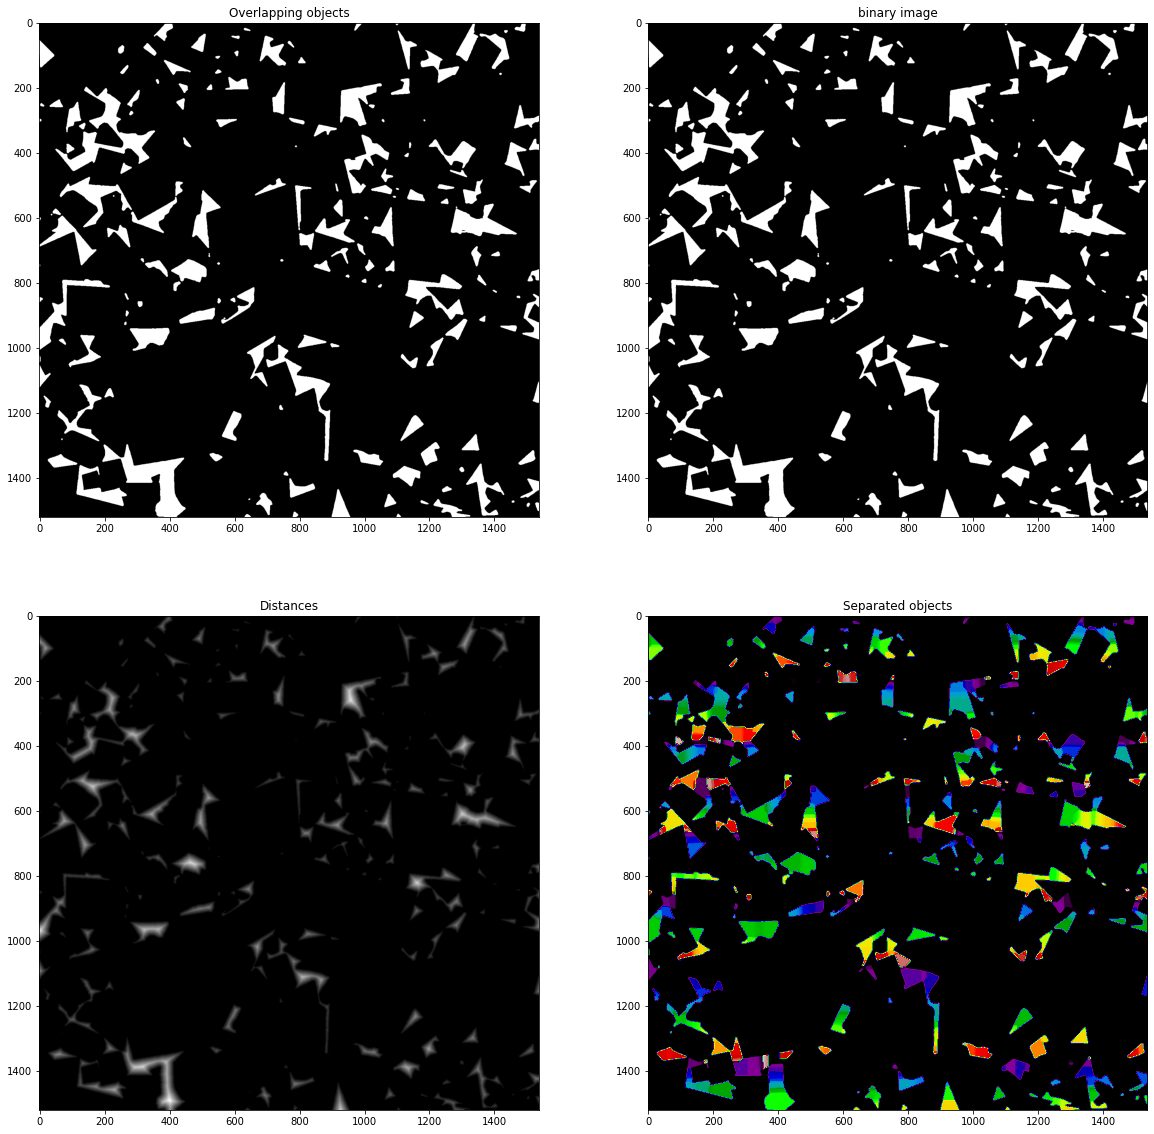

In [22]:
bin_image=grain_images[2]
distance = ndi.distance_transform_edt(bin_image)
distance_copy=copy.copy(distance)

coords = peak_local_max(distance_copy, footprint=np.ones((3, 3)), labels=bin_image).astype('int64')

mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

labels = seg.watershed(-distance, markers, mask=bin_image)
labels=labels.astype('uint8')



fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(20,20))
ax = axes.ravel()


ax[0].imshow(bin_image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')

ax[1].imshow(bin_image, cmap=plt.cm.gray)
ax[1].set_title('binary image')

ax[2].imshow(distance, cmap=plt.cm.gray)
ax[2].set_title('Distances')


ax[3].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[3].set_title('Separated objects')

In [196]:
grain=io.imread('images'+'/'+grain_names[2])
grain=grainPreprocess.combine(grain,h=150,k=1)

D:\PROJECTS\python\grain_segmentation\grain_utils.py:61: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img=rgb2gray(gray)


In [197]:
denoised = filters.rank.median(grain, disk(5))
binary=grainPreprocess.do_otsu(denoised).astype('uint8')

https://www.researchgate.net/publication/285311084_Implementation_of_an_effective_time-saving_two-stage_methodology_for_microstructural_characterization_of_cemented_carbides

Text(0.5, 1.0, 'Separated objects')

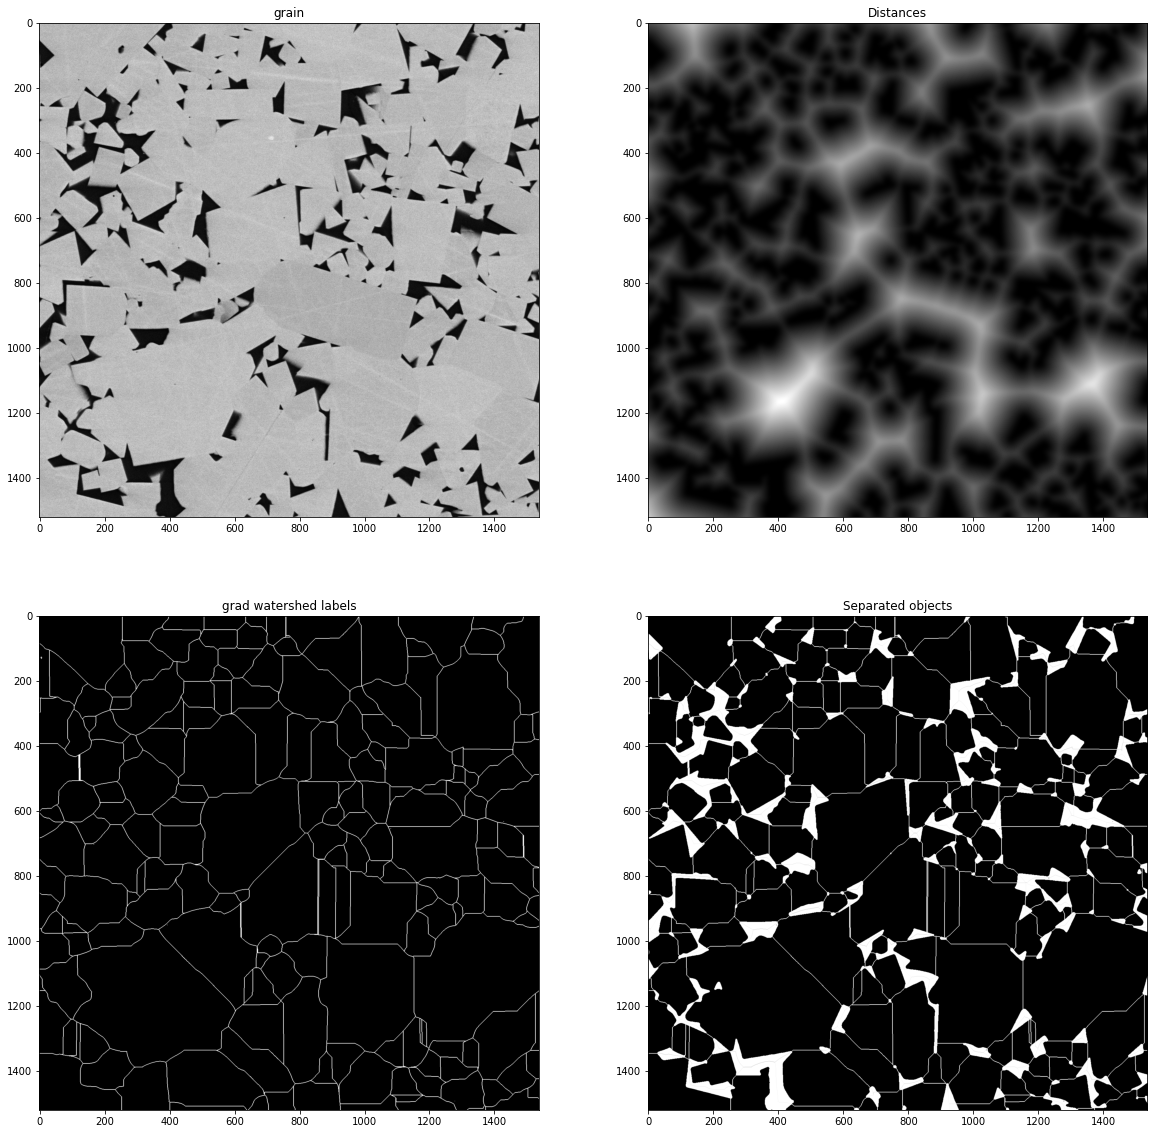

In [198]:

distance = ndi.distance_transform_edt(binary).astype('uint8')
distance=filters.gaussian(distance,sigma=6)

distance_copy=copy.copy(distance)

coords = peak_local_max(distance_copy, footprint=np.ones((9, 3)), labels=binary).astype('int64')

mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

labels = seg.watershed(-distance, markers,mask=grain)
labels=labels.astype('uint8')



fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(20,20))
ax = axes.ravel()



ax[0].imshow(grain, cmap=plt.cm.gray)
ax[0].set_title('grain')

ax[1].imshow(distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')

grad = abs(filters.rank.gradient(labels, disk(1))).astype('uint8')
ax[2].imshow(grad*255, cmap=plt.cm.gray)
ax[2].set_title('grad watershed labels')




labels=grad*255+(1-binary)*255
ax[3].imshow(labels, cmap='gray')
ax[3].set_title('Separated objects')



In [143]:
io.imsave('labels.png',labels)

In [91]:
io.imsave('grad.png',grad)

In [130]:
io.imsave('combined.png',np.array(combined))

In [71]:
grad_binary=grainPreprocess.do_otsu(grad)

In [73]:
grad_binary

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [182]:
distance=np.array(distance*255).astype('uint8')

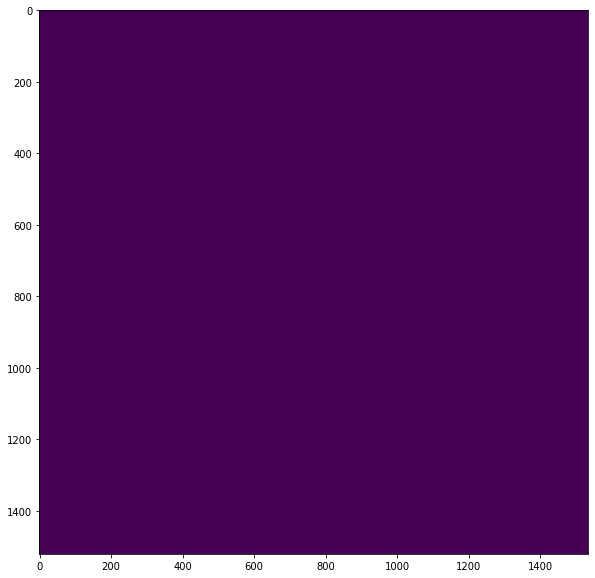

In [183]:
img = cv2.Canny(distance,0,255,L2gradient=False)
plt.figure(figsize=(10,10))
plt.imshow(img)

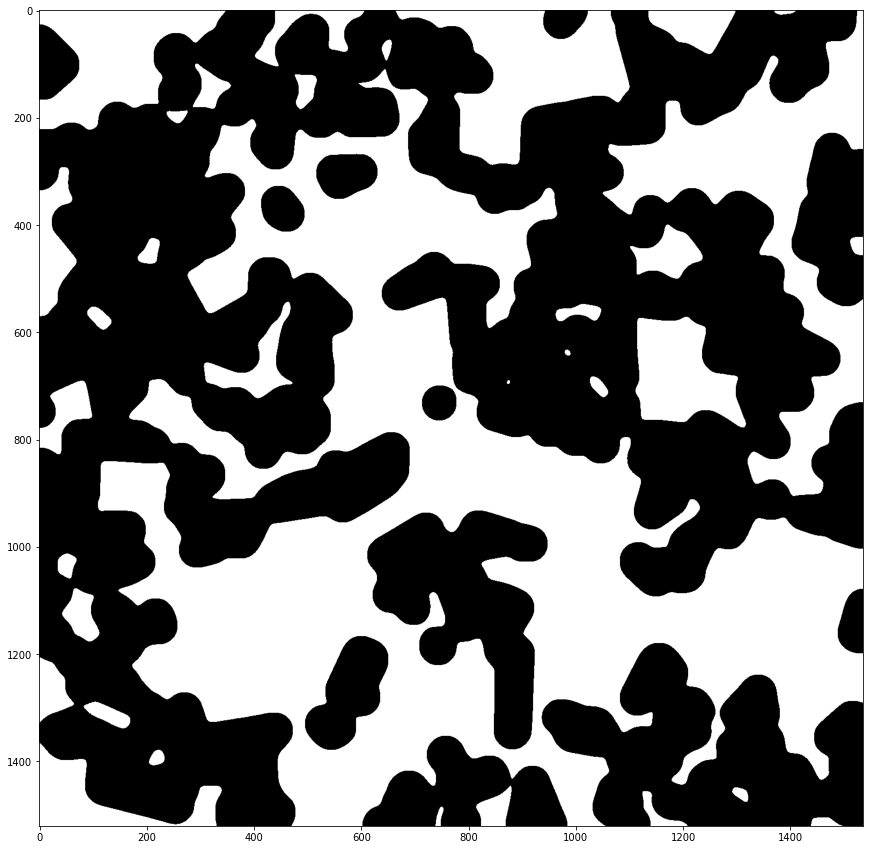

In [181]:
grad = abs(filters.rank.gradient(grain, disk(1))).astype('uint8')<30
img=grad==0
img=np.array(distance*255).astype('uint8')
img=img>30

plt.figure(figsize=(15,15))
plt.imshow(im\\,cmap='gray')

In [184]:
distance

array([[ 54,  54,  54, ...,  38,  39,  39],
       [ 54,  54,  54, ...,  38,  39,  39],
       [ 53,  53,  53, ...,  38,  39,  39],
       ...,
       [132, 132, 131, ...,  17,  16,  16],
       [132, 132, 131, ...,  17,  17,  17],
       [133, 132, 132, ...,  18,  18,  17]], dtype=uint8)

In [161]:
io.imsave('edt.png',img)

Lossy conversion from float64 to uint8. Range [0.0, 171.5016172961523]. Convert image to uint8 prior to saving to suppress this warning.


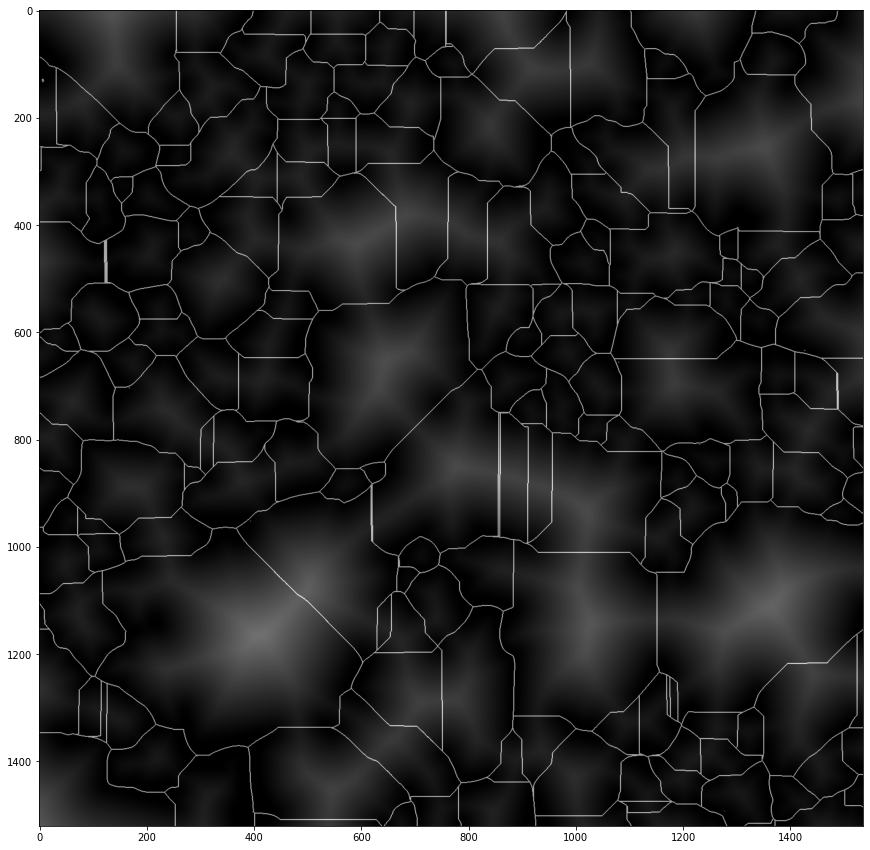

In [199]:
dis_and_grad=grad*255+distance*255
plt.figure(figsize=(15,15))
plt.imshow(dis_and_grad,cmap='gray')

In [200]:
binary=grainPreprocess.do_otsu(dis_and_grad).astype('uint8')

Text(0.5, 1.0, 'Separated objects')

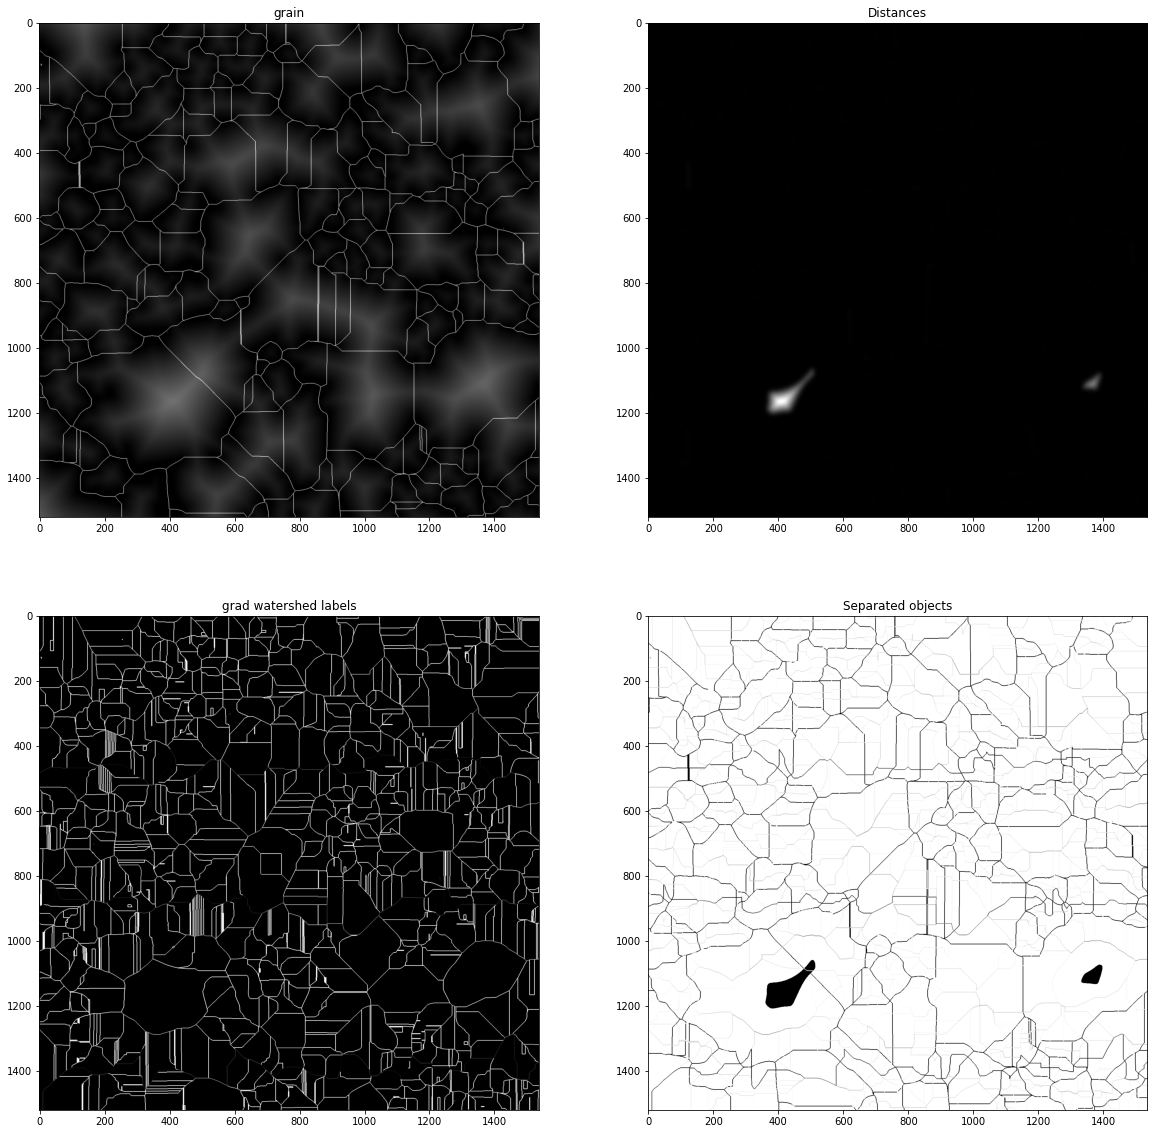

In [202]:

distance = ndi.distance_transform_edt(binary).astype('uint8')
distance=filters.gaussian(distance,sigma=6)

distance_copy=copy.copy(distance)

coords = peak_local_max(distance_copy, footprint=np.ones((9, 3)), labels=binary).astype('int64')

mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

labels = seg.watershed(-distance, markers,mask=grain)
labels=labels.astype('uint8')



fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(20,20))
ax = axes.ravel()



ax[0].imshow(dis_and_grad, cmap=plt.cm.gray)
ax[0].set_title('grain')

ax[1].imshow(distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')

grad = abs(filters.rank.gradient(labels, disk(1))).astype('uint8')
ax[2].imshow(grad*255, cmap=plt.cm.gray)
ax[2].set_title('grad watershed labels')




labels=grad*255+(1-binary)*255
ax[3].imshow(labels, cmap='gray')
ax[3].set_title('Separated objects')



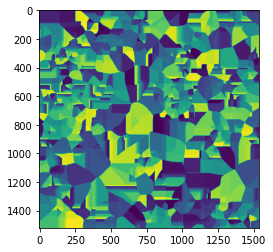

In [203]:
labels = seg.watershed(dis_and_grad,mask=grain)
labels=labels.astype('uint8')

plt.imshow(labels)